<h1 align=center><font size = 5>The Battle of Neighbourhoods — Mumbai vs. New York</font></h1>

### Compare the neighbourhoods of the two cities of Mumbai and NYC and determine how similar or dissimilar they are in terms of availability food options such as restaurants and other entertainment options.

## Introduction
In order to accommodate the people choosing to move (for business purposes) from Mumbai to NYC or vice versa one needs information about the similarities in the neighbourhoods of these cities. 
Here we are attempting to analyse the neighbourhoods in each of these two cities and find similarities in terms of quality of life offered by venues catering to food, entertainment etc. highly rated by and most popular amongst the current residents of the neighbourhood of these two amazing cities of the world.


Before we get the data and start exploring it, let's download all the dependencies that we will need.

In [4]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

# !conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

#!pip install bs4
from bs4 import BeautifulSoup #importing BeautifulSoup library for web scraping

print('Libraries imported.')

     |████████████████████████████████| 122kB 1.0MB/s eta 0:00:01
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/a0/b0/b2/4f80b9456b87abedbc0bf2d52235414c3467d8889be38dd472
Successfully built bs4
Libraries imported.


## 1. Download and Explore Dataset

### 1.1 Download Mumbai neighbourhood data with the coordinates

In [5]:
url = requests.get('https://en.wikipedia.org/wiki/List_of_neighbourhoods_in_Mumbai#Mumbai_neighbourhood_coordintes').text

soup = BeautifulSoup(url, 'lxml')

In [6]:
My_table =soup.find_all('table',{'class':'wikitable sortable' })

In [7]:
rows = My_table[0].findAll('tr')

In [8]:
Area = []
Location = []
Latitude = []
Longitude = []

for row in rows:
    columns = row.findAll('td')
    if len(columns) == 4:
        Area.append(columns[0].find(text = True).rstrip())
        Location.append(columns[1].find(text = True).rstrip())
        Latitude.append(columns[2].find(text = True).rstrip())
        Longitude.append(columns[3].find(text = True).rstrip())

In [9]:
df = pd.DataFrame(Area, columns = ['Neighbourhood'])
df['Location'] = Location
df['Latitude'] = Latitude
df['Longitude'] = Longitude
df.head()

,Neighbourhood,Location,Latitude,Longitude
0,Amboli,"Andheri,Western Suburbs",19.1293,72.8434
1,"Chakala, Andheri",Western Suburbs,19.111388,72.860833
2,D.N. Nagar,"Andheri,Western Suburbs",19.124085,72.831373
3,Four Bungalows,"Andheri,Western Suburbs",19.124714,72.82721
4,Lokhandwala,"Andheri,Western Suburbs",19.130815,72.82927


In [10]:
convert_dict = { 'Latitude' : float, 'Longitude' : float}
df = df.astype(convert_dict)
df.dtypes

Neighbourhood     object
Location          object
Latitude         float64
Longitude        float64
dtype: object

In [13]:
df.head()

,Neighbourhood,Location,Latitude,Longitude
0,Amboli,"Andheri,Western Suburbs",19.129300,72.843400
1,"Chakala, Andheri",Western Suburbs,19.111388,72.860833
2,D.N. Nagar,"Andheri,Western Suburbs",19.124085,72.831373
3,Four Bungalows,"Andheri,Western Suburbs",19.124714,72.827210
4,Lokhandwala,"Andheri,Western Suburbs",19.130815,72.829270


In [16]:
df.shape

(93, 4)

In [18]:
df

,Neighbourhood,Location,Latitude,Longitude
0,Amboli,"Andheri,Western Suburbs",19.129300,72.843400
1,"Chakala, Andheri",Western Suburbs,19.111388,72.860833
2,D.N. Nagar,"Andheri,Western Suburbs",19.124085,72.831373
3,Four Bungalows,"Andheri,Western Suburbs",19.124714,72.827210
4,Lokhandwala,"Andheri,Western Suburbs",19.130815,72.829270
5,Marol,"Andheri,Western Suburbs",19.119219,72.882743
6,Sahar,"Andheri,Western Suburbs",19.098889,72.867222
7,Seven Bungalows,"Andheri,Western Suburbs",19.129052,72.817018
8,Versova,"Andheri,Western Suburbs",19.120000,72.820000
9,Mira Road,"Mira-Bhayandar,Western Suburbs",19.284167,72.871111


In [19]:
# Corrected some data

df.at[41,'Latitude'] = 19.0640
df.at[41,'Longitude'] = 72.8826
df.at[82,'Latitude'] = 19.0197
df.at[82,'Longitude'] = 72.8479
df.at[68,'Latitude'] = 18.9865
df.at[68,'Longitude'] = 72.8183

In [20]:
df

,Neighbourhood,Location,Latitude,Longitude
0,Amboli,"Andheri,Western Suburbs",19.129300,72.843400
1,"Chakala, Andheri",Western Suburbs,19.111388,72.860833
2,D.N. Nagar,"Andheri,Western Suburbs",19.124085,72.831373
3,Four Bungalows,"Andheri,Western Suburbs",19.124714,72.827210
4,Lokhandwala,"Andheri,Western Suburbs",19.130815,72.829270
5,Marol,"Andheri,Western Suburbs",19.119219,72.882743
6,Sahar,"Andheri,Western Suburbs",19.098889,72.867222
7,Seven Bungalows,"Andheri,Western Suburbs",19.129052,72.817018
8,Versova,"Andheri,Western Suburbs",19.120000,72.820000
9,Mira Road,"Mira-Bhayandar,Western Suburbs",19.284167,72.871111


In [22]:
# Get Mumbai coordinates
address = 'Mumbai, India'
geolocator = Nominatim(user_agent= 'akashkadam1180@gmail.com')
location = None
while(location is None):
    location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The location coordinate of Mumbai are {}, {}.'.format(latitude, longitude))

The location coordinate of Mumbai are 19.0759899, 72.8773928.


In [24]:
# Display a map of Mumbai with the neighbourhoods markked
# create map of New York using latitude and longitude values
map_mumbai = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, area in zip(df['Latitude'], df['Longitude'], df['Neighbourhood']):
    label = '{},Mumbai,India'.format(area)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_mumbai)

In [25]:
map_mumbai

### 1.2 Explore Mumbai neighbourhoods with foursquare API

In [30]:
CLIENT_ID = 'S3BUNLSRTBBYU4PETEL4YEOVKRJVUYGISOSUQ4AWUC2EXAVU' # your Foursquare ID
CLIENT_SECRET = 'SHB3XXUAMJTABTHDSVV0CG1PJOTCTYCHJQMD03ATIW3IA0RG' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value
RADIUS = 500

In [31]:
venues = []
for lat,long,area,location in zip(df['Latitude'], df['Longitude'], df['Neighbourhood'], df['Location']):
    url = "https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}".format(
        CLIENT_ID,
        CLIENT_SECRET,
        VERSION,
        lat,
        long,
        RADIUS, 
        LIMIT)
    
    results = requests.get(url).json()["response"]['groups'][0]['items']
    for venue in results:
            venues.append((
            area,
            location,
            lat, 
            long, 
            venue['venue']['name'], 
            venue['venue']['location']['lat'], 
            venue['venue']['location']['lng'],  
            venue['venue']['categories'][0]['name']))

In [33]:
venues_df = pd.DataFrame(venues)

# define the column names
venues_df.columns = ['Neighbourhood', 'Location', 'Latitude', 'Longitude', 'VenueName', 'VenueLatitude', 'VenueLongitude', 'VenueCategory']

print(venues_df.shape)
venues_df.head()

(1329, 8)


,Neighbourhood,Location,Latitude,Longitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
0,Amboli,"Andheri,Western Suburbs",19.1293,72.8434,"5 Spice , Bandra",19.130421,72.847206,Chinese Restaurant
1,Amboli,"Andheri,Western Suburbs",19.1293,72.8434,Cafe Arfa,19.128930,72.847140,Indian Restaurant
2,Amboli,"Andheri,Western Suburbs",19.1293,72.8434,Subway,19.127860,72.844461,Sandwich Place
3,Amboli,"Andheri,Western Suburbs",19.1293,72.8434,Cafe Coffee Day,19.127748,72.844663,Coffee Shop
4,Amboli,"Andheri,Western Suburbs",19.1293,72.8434,V33,19.129068,72.843670,Gym


In [34]:
# find unique venue categories
uniquevenues = len(venues_df.VenueCategory.unique())
uniquevenues

176

In [35]:

venues_df['VenueCategory'].unique()[:50]

array(['Chinese Restaurant', 'Indian Restaurant', 'Sandwich Place',
       'Coffee Shop', 'Gym', 'Park', 'Fast Food Restaurant', 'Hotel',
       'Café', 'Falafel Restaurant', 'Pizza Place', 'Cocktail Bar',
       'Restaurant', 'Asian Restaurant', 'Multiplex',
       'Seafood Restaurant', 'Movie Theater', 'Lounge', 'Liquor Store',
       'Gym / Fitness Center', 'Snack Place', 'Juice Bar',
       "Women's Store", 'Residential Building (Apartment / Condo)',
       'Vegetarian / Vegan Restaurant', 'Fish Market', 'Bar', 'Bakery',
       'Sports Club', 'Market', 'Convenience Store', 'Pub',
       'Concert Hall', 'Department Store', 'Yoga Studio',
       'Ice Cream Shop', 'Diner', 'Food', 'South Indian Restaurant',
       'Bistro', 'Recreation Center', 'Dim Sum Restaurant', 'Smoke Shop',
       'Dessert Shop', 'Creperie', 'Salon / Barbershop',
       'North Indian Restaurant', 'Food Truck', 'Clothing Store',
       'Music Venue'], dtype=object)

In [39]:
venues_df['VenueCategory'].value_counts().head(50)

Indian Restaurant                163
Café                              84
Coffee Shop                       54
Fast Food Restaurant              53
Bakery                            42
Ice Cream Shop                    40
Chinese Restaurant                39
Bar                               38
Restaurant                        34
Pizza Place                       34
Snack Place                       28
Dessert Shop                      27
Hotel                             24
Italian Restaurant                24
Seafood Restaurant                22
Lounge                            18
Sandwich Place                    18
Vegetarian / Vegan Restaurant     17
Electronics Store                 15
Clothing Store                    15
Gym                               13
Convenience Store                 12
Juice Bar                         11
Food Truck                        11
Asian Restaurant                  11
Department Store                  11
Multiplex                         10
T

In [ ]:
grouped_venues = venues_df.groupby(["Neighbourhood"])

Further analyse the venues per location

In [41]:
mum_onehot = pd.get_dummies(venues_df["VenueCategory"], prefix = "", prefix_sep = "")

# add neighborhood column back to dataframe
mum_onehot['Neighbourhoods'] = venues_df['Neighbourhood']

# move neighborhood column to the first column
fixed_columns = [mum_onehot.columns[-1]] + list(mum_onehot.columns[:-1])
mum_onehot = mum_onehot[fixed_columns]

print(mum_onehot.shape)
mum_onehot.head()

(1329, 177)


,Neighbourhoods,Advertising Agency,Afghan Restaurant,American Restaurant,Amphitheater,Antique Shop,Aquarium,Arcade,Art Gallery,Arts & Crafts Store,Asian Restaurant,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bar,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Bengali Restaurant,Big Box Store,Bistro,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bridal Shop,Burger Joint,Bus Station,Cafeteria,Café,Chaat Place,Cheese Shop,Chinese Restaurant,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Auditorium,Comedy Club,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Cricket Ground,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dhaba,Dim Sum Restaurant,Diner,Dog Run,Donut Shop,Electronics Store,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Fish Market,Flea Market,Flower Shop,Food,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Garden,Garden Center,Gastropub,General Entertainment,German Restaurant,Gift Shop,Goan Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Historic Site,History Museum,Hookah Bar,Hotel,Hotel Bar,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indie Movie Theater,Indoor Play Area,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Lake,Lighthouse,Liquor Store,Lounge,Maharashtrian Restaurant,Market,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Movie Theater,Moving Target,Mughlai Restaurant,Multiplex,Music Store,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,North Indian Restaurant,Office,Other Great Outdoors,Paper / Office Supplies Store,Park,Parsi Restaurant,Performing Arts Venue,Pizza Place,Planetarium,Platform,Playground,Plaza,Pool,Pub,Recreation Center,Residential Building (Apartment / Condo),Resort,Restaurant,Road,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Smoke Shop,Snack Place,Soccer Field,South Indian Restaurant,Souvenir Shop,Spa,Sporting Goods Shop,Sports Bar,Sports Club,Stadium,Steakhouse,Tea Room,Tennis Court,Tennis Stadium,Tex-Mex Restaurant,Theater,Tourist Information Center,Toy / Game Store,Train Station,Vegetarian / Vegan Restaurant,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,Amboli,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Amboli,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Amboli,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Amboli,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Amboli,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [42]:
mum_grouped = mum_onehot.groupby(["Neighbourhoods"]).mean().reset_index()

print(mum_grouped.shape)
mum_grouped.head(10)

(88, 177)


,Neighbourhoods,Advertising Agency,Afghan Restaurant,American Restaurant,Amphitheater,Antique Shop,Aquarium,Arcade,Art Gallery,Arts & Crafts Store,Asian Restaurant,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bar,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Bengali Restaurant,Big Box Store,Bistro,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bridal Shop,Burger Joint,Bus Station,Cafeteria,Café,Chaat Place,Cheese Shop,Chinese Restaurant,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Auditorium,Comedy Club,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Cricket Ground,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dhaba,Dim Sum Restaurant,Diner,Dog Run,Donut Shop,Electronics Store,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Fish Market,Flea Market,Flower Shop,Food,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Garden,Garden Center,Gastropub,General Entertainment,German Restaurant,Gift Shop,Goan Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Historic Site,History Museum,Hookah Bar,Hotel,Hotel Bar,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indie Movie Theater,Indoor Play Area,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Lake,Lighthouse,Liquor Store,Lounge,Maharashtrian Restaurant,Market,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Movie Theater,Moving Target,Mughlai Restaurant,Multiplex,Music Store,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,North Indian Restaurant,Office,Other Great Outdoors,Paper / Office Supplies Store,Park,Parsi Restaurant,Performing Arts Venue,Pizza Place,Planetarium,Platform,Playground,Plaza,Pool,Pub,Recreation Center,Residential Building (Apartment / Condo),Resort,Restaurant,Road,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Smoke Shop,Snack Place,Soccer Field,South Indian Restaurant,Souvenir Shop,Spa,Sporting Goods Shop,Sports Bar,Sports Club,Stadium,Steakhouse,Tea Room,Tennis Court,Tennis Stadium,Tex-Mex Restaurant,Theater,Tourist Information Center,Toy / Game Store,Train Station,Vegetarian / Vegan Restaurant,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,Agripada,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.250000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.000000,0.0000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0000,0.250000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.250000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.000000,0.0,0.250000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Altamount Road,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.142857,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.000000,0.0000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.285714,0.0,0.0,0.000000,0.000000,0.0,0.0000,0.142857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.000000,0.0,0.142857,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0000

In [43]:
num_top_venues = 10

for hood in mum_grouped['Neighbourhoods']:
    print("----"+hood+"----")
    temp = mum_grouped[mum_grouped['Neighbourhoods'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Agripada----
                venue  freq
0   Indian Restaurant  0.25
1                 Gym  0.25
2         Coffee Shop  0.25
3              Bakery  0.25
4  Advertising Agency  0.00
5        Noodle House  0.00
6       Moving Target  0.00
7  Mughlai Restaurant  0.00
8           Multiplex  0.00
9         Music Store  0.00


----Altamount Road----
                venue  freq
0                Café  0.29
1   Indian Restaurant  0.14
2         Coffee Shop  0.14
3             Theater  0.14
4      Sandwich Place  0.14
5              Bakery  0.14
6  Advertising Agency  0.00
7           Nightclub  0.00
8  Mughlai Restaurant  0.00
9           Multiplex  0.00


----Amboli----
                     venue  freq
0        Indian Restaurant  0.14
1                     Park  0.14
2     Fast Food Restaurant  0.14
3                      Gym  0.14
4              Coffee Shop  0.14
5           Sandwich Place  0.14
6       Chinese Restaurant  0.14
7       Advertising Agency  0.00
8  New American Restaurant  

#### Create a new data frame with top 10 venues for each neighbourhood


In [45]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [46]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighbourhood'] = mum_grouped['Neighbourhoods']

for ind in np.arange(mum_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(mum_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agripada,Bakery,Gym,Indian Restaurant,Coffee Shop,Yoga Studio,Field,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Event Space
1,Altamount Road,Café,Coffee Shop,Indian Restaurant,Sandwich Place,Theater,Bakery,Yoga Studio,Fast Food Restaurant,Farmers Market,Falafel Restaurant
2,Amboli,Fast Food Restaurant,Park,Gym,Coffee Shop,Indian Restaurant,Chinese Restaurant,Sandwich Place,Diner,Farmers Market,Falafel Restaurant
3,Amrut Nagar,Indian Restaurant,Café,Fast Food Restaurant,Electronics Store,Clothing Store,Pizza Place,Brewery,Sandwich Place,Bowling Alley,Mediterranean Restaurant
4,Asalfa,Men's Store,Yoga Studio,Flea Market,Field,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Event Space,Electronics Store,Donut Shop


### 1.3 Cluster Mumbai neighbourhoods with venue data from foursquare API

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot(x, y, xlabel, ylabel):
    plt.figure(figsize=(20,10))
    plt.plot(np.arange(2, x), y, 'o-')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(np.arange(2, x))
    plt.show()

In [49]:
max_range = 8

mum_grouped_clustering = mum_grouped.drop('Neighbourhoods', axis = 1)
mum_grouped_clustering.head()

,Advertising Agency,Afghan Restaurant,American Restaurant,Amphitheater,Antique Shop,Aquarium,Arcade,Art Gallery,Arts & Crafts Store,Asian Restaurant,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bar,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Bengali Restaurant,Big Box Store,Bistro,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bridal Shop,Burger Joint,Bus Station,Cafeteria,Café,Chaat Place,Cheese Shop,Chinese Restaurant,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Auditorium,Comedy Club,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Cricket Ground,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dhaba,Dim Sum Restaurant,Diner,Dog Run,Donut Shop,Electronics Store,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Fish Market,Flea Market,Flower Shop,Food,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Garden,Garden Center,Gastropub,General Entertainment,German Restaurant,Gift Shop,Goan Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Historic Site,History Museum,Hookah Bar,Hotel,Hotel Bar,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indie Movie Theater,Indoor Play Area,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Lake,Lighthouse,Liquor Store,Lounge,Maharashtrian Restaurant,Market,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Movie Theater,Moving Target,Mughlai Restaurant,Multiplex,Music Store,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,North Indian Restaurant,Office,Other Great Outdoors,Paper / Office Supplies Store,Park,Parsi Restaurant,Performing Arts Venue,Pizza Place,Planetarium,Platform,Playground,Plaza,Pool,Pub,Recreation Center,Residential Building (Apartment / Condo),Resort,Restaurant,Road,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Smoke Shop,Snack Place,Soccer Field,South Indian Restaurant,Souvenir Shop,Spa,Sporting Goods Shop,Sports Bar,Sports Club,Stadium,Steakhouse,Tea Room,Tennis Court,Tennis Stadium,Tex-Mex Restaurant,Theater,Tourist Information Center,Toy / Game Store,Train Station,Vegetarian / Vegan Restaurant,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.250000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.250000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.250000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.250000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.142857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.285714,0.0,0.0,0.000000,0.000000,0.0,0.0,0.142857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.142857,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.142857,0.0,0.0,0.0,0.0

In [50]:
from sklearn.metrics import silhouette_samples, silhouette_score

indices = []
scores = []

for kclusters in range(2, max_range) :
    
    # Run k-means clustering
    kmc = mum_grouped_clustering
    kmeans = KMeans(n_clusters = kclusters, init = 'k-means++', random_state = 0).fit_predict(kmc)
    
    # Gets the score for the clustering operation performed
    score = silhouette_score(kmc, kmeans)
    
    # Appending the index and score to the respective lists
    indices.append(kclusters)
    scores.append(score)

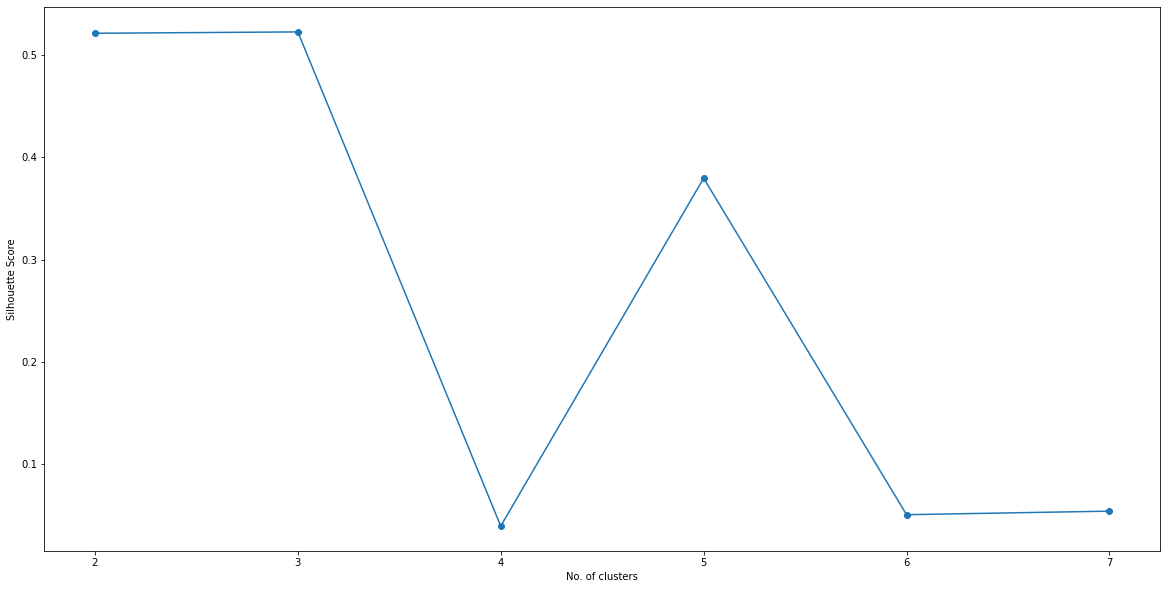

In [51]:
plot(max_range, scores, "No. of clusters", "Silhouette Score")

#### The best K is 6

In [52]:
# run k-means clustering
kmeans = KMeans(n_clusters=6, random_state=0).fit(mum_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([1, 3, 3, 3, 4, 3, 3, 3, 3, 3], dtype=int32)

In [53]:
# add clustering labels
venues_sorted = neighborhoods_venues_sorted
venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [54]:
mumbai_merged = df

# merge mumbai_merged with neighbourhoods_venues_sorted to add latitude/longitude for each neighborhood
mumbai_merged = mumbai_merged.join(neighborhoods_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood')

mumbai_merged

,Neighbourhood,Location,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Amboli,"Andheri,Western Suburbs",19.129300,72.843400,3.0,Fast Food Restaurant,Park,Gym,Coffee Shop,Indian Restaurant,Chinese Restaurant,Sandwich Place,Diner,Farmers Market,Falafel Restaurant
1,"Chakala, Andheri",Western Suburbs,19.111388,72.860833,3.0,Fast Food Restaurant,Restaurant,Hotel,Multiplex,Café,Falafel Restaurant,Seafood Restaurant,Pizza Place,Lounge,Cocktail Bar
2,D.N. Nagar,"Andheri,Western Suburbs",19.124085,72.831373,1.0,Gym / Fitness Center,Pizza Place,Indian Restaurant,Snack Place,Yoga Studio,Diner,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Event Space
3,Four Bungalows,"Andheri,Western Suburbs",19.124714,72.827210,3.0,Gym,Bakery,Pizza Place,Residential Building (Apartment / Condo),Sandwich Place,Fish Market,Market,Juice Bar,Sports Club,Bar
4,Lokhandwala,"Andheri,Western Suburbs",19.130815,72.829270,3.0,Restaurant,Lounge,Department Store,Yoga Studio,Women's Store,Indian Restaurant,Liquor Store,Market,Concert Hall,Pizza Place
5,Marol,"Andheri,Western Suburbs",19.119219,72.882743,1.0,Indian Restaurant,Ice Cream Shop,Snack Place,Diner,Bakery,Department Store,Asian Restaurant,Coffee Shop,Vegetarian / Vegan Restaurant,Hotel
6,Sahar,"Andheri,Western Suburbs",19.098889,72.867222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Seven Bungalows,"Andheri,Western Suburbs",19.129052,72.817018,3.0,Café,Ice Cream Shop,Chinese Restaurant,Pub,Indian Restaurant,Seafood Restaurant,Bar,Smoke Shop,Creperie,Salon / Barbershop
8,Versova,"Andheri,Western Suburbs",19.120000,72.820000,2.0,Bar,Yoga Studio,Flower Shop,Fish Market,Field,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Event Space,Electronics Store
9,Mira Road,"Mira-Bhayandar,Western Suburbs",19.284167,72.871111,3.0,Pizza Place,Café,Chinese Restaurant,Field,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Event Space,Electronics Store,Donut Shop


### 1.4 List top Mumbai Neighbourhood clusters

In [55]:
# print the clusterwise neighbourhood counts
print(mumbai_merged['Cluster Labels'].value_counts())

3.0    54
1.0    29
5.0     2
0.0     1
4.0     1
2.0     1
Name: Cluster Labels, dtype: int64


In [56]:
# Now we can visualize the Mumbai neighbourhood clusters
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

In [59]:
cluster_colours = ['#052ef7', '#f7df02', '#0be31a', '#f00028', '#f011aa','#02f79e']

In [64]:
mum_merged = mumbai_merged.dropna()

In [65]:
# add markers to the map
for lat, lon, poi, cluster in zip(mum_merged['Latitude'], mum_merged['Longitude'], mum_merged['Neighbourhood'], mum_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=cluster_colours[int(cluster)],
        fill=True,
        fill_color=cluster_colours[int(cluster)],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Let us take a closer detailed look at the Mumbai Neighbourhood clusters

In [66]:
mumbai_merged.loc[mumbai_merged['Cluster Labels'] == 0]

,Neighbourhood,Location,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
60,Cuffe Parade,South Mumbai,18.91,72.81,0.0,Garden,Yoga Studio,Flea Market,Field,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Event Space,Electronics Store,Donut Shop


In [68]:
mumbai_merged.loc[mumbai_merged['Cluster Labels'] == 1]

,Neighbourhood,Location,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,D.N. Nagar,"Andheri,Western Suburbs",19.124085,72.831373,1.0,Gym / Fitness Center,Pizza Place,Indian Restaurant,Snack Place,Yoga Studio,Diner,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Event Space
5,Marol,"Andheri,Western Suburbs",19.119219,72.882743,1.0,Indian Restaurant,Ice Cream Shop,Snack Place,Diner,Bakery,Department Store,Asian Restaurant,Coffee Shop,Vegetarian / Vegan Restaurant,Hotel
11,Uttan,"Mira-Bhayandar,Western Suburbs",19.280000,72.785000,1.0,Beach,Playground,Indian Restaurant,Bus Station,Resort,Yoga Studio,Dog Run,Fast Food Restaurant,Farmers Market,Falafel Restaurant
16,Gorai,"Borivali (West),Western Suburbs",19.250057,72.782021,1.0,Resort,Seafood Restaurant,Aquarium,Tourist Information Center,Indian Restaurant,Yoga Studio,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Event Space
21,Juhu,Western Suburbs,19.100000,72.830000,1.0,Indian Restaurant,Bar,Hotel,Café,Dessert Shop,Spa,Nightclub,Beach,Fast Food Restaurant,Seafood Restaurant
27,Khar Danda,"Khar,Western Suburbs",19.068598,72.840042,1.0,Indian Restaurant,Bar,Pub,Lounge,Grocery Store,Gastropub,Beer Garden,Beer Bar,Fast Food Restaurant,Plaza
29,Sunder Nagar,"Malad,Western Suburbs",19.175000,72.842000,1.0,Indian Restaurant,Chinese Restaurant,Electronics Store,American Restaurant,Hotel,Gym,Dessert Shop,Coffee Shop,Bus Station,Diner
35,Vile Parle,Western Suburbs,19.100000,72.830000,1.0,Indian Restaurant,Bar,Hotel,Café,Dessert Shop,Spa,Nightclub,Beach,Fast Food Restaurant,Seafood Restaurant
39,Pant Nagar,"Ghatkopar,Eastern Suburbs",19.080000,72.910000,1.0,Indian Restaurant,Ice Cream Shop,Vegetarian / Vegan Restaurant,Pizza Place,Multiplex,Gym / Fitness Center,Snack Place,Coffee Shop,Mobile Phone Shop,Food Truck
42,Nahur,"Mulund,Eastern Suburbs",19.157000,72.941000,1.0,Indian Restaurant,Ice Cream Shop,Restaurant,Yoga Studio,Dim Sum Restaurant,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Event Space,Electronics Store


#### we observe that cluster 1 consists of neighbourhoods belonging to the quintessential "old" Mumbai with venues overbearingly depicting classical tastes such as Jewellery, cup cake, grocery, plaza, beach, playground etc.

In [69]:
mumbai_merged.loc[mumbai_merged['Cluster Labels'] == 2]

,Neighbourhood,Location,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,Versova,"Andheri,Western Suburbs",19.12,72.82,2.0,Bar,Yoga Studio,Flower Shop,Fish Market,Field,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Event Space,Electronics Store


In [70]:
mumbai_merged.loc[mumbai_merged['Cluster Labels'] == 3]

,Neighbourhood,Location,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Amboli,"Andheri,Western Suburbs",19.129300,72.843400,3.0,Fast Food Restaurant,Park,Gym,Coffee Shop,Indian Restaurant,Chinese Restaurant,Sandwich Place,Diner,Farmers Market,Falafel Restaurant
1,"Chakala, Andheri",Western Suburbs,19.111388,72.860833,3.0,Fast Food Restaurant,Restaurant,Hotel,Multiplex,Café,Falafel Restaurant,Seafood Restaurant,Pizza Place,Lounge,Cocktail Bar
3,Four Bungalows,"Andheri,Western Suburbs",19.124714,72.827210,3.0,Gym,Bakery,Pizza Place,Residential Building (Apartment / Condo),Sandwich Place,Fish Market,Market,Juice Bar,Sports Club,Bar
4,Lokhandwala,"Andheri,Western Suburbs",19.130815,72.829270,3.0,Restaurant,Lounge,Department Store,Yoga Studio,Women's Store,Indian Restaurant,Liquor Store,Market,Concert Hall,Pizza Place
7,Seven Bungalows,"Andheri,Western Suburbs",19.129052,72.817018,3.0,Café,Ice Cream Shop,Chinese Restaurant,Pub,Indian Restaurant,Seafood Restaurant,Bar,Smoke Shop,Creperie,Salon / Barbershop
9,Mira Road,"Mira-Bhayandar,Western Suburbs",19.284167,72.871111,3.0,Pizza Place,Café,Chinese Restaurant,Field,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Event Space,Electronics Store,Donut Shop
10,Bhayandar,"Mira-Bhayandar,Western Suburbs",19.290000,72.850000,3.0,Shipping Store,Yoga Studio,Convenience Store,Field,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Event Space,Electronics Store,Donut Shop
12,Bandstand Promenade,"Bandra,Western Suburbs",19.042718,72.819132,3.0,Scenic Lookout,Boat or Ferry,Beach,Lounge,Food Truck,Cocktail Bar,Italian Restaurant,Café,Indian Restaurant,Boutique
13,Kherwadi,"Bandra,Western Suburbs",19.055300,72.831400,3.0,Indian Restaurant,Café,Bar,Bakery,Chinese Restaurant,Snack Place,Gourmet Shop,Pizza Place,Clothing Store,Mediterranean Restaurant
14,Pali Hill,"Bandra,Western Suburbs",19.068000,72.826000,3.0,Fast Food Restaurant,Ice Cream Shop,Bakery,Cupcake Shop,Dessert Shop,Italian Restaurant,BBQ Joint,Indian Restaurant,Scenic Lookout,Sandwich Place


#### We observe that cluster 3 consists of some what neighbourhoods with top venues of specialized restaurants, cafes, ice cream, bars and the sea side with a focus on entertainment

In [67]:
mumbai_merged.loc[mumbai_merged['Cluster Labels'] == 4]

,Neighbourhood,Location,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
38,Asalfa,"Ghatkopar,Eastern Suburbs",19.091,72.901,4.0,Men's Store,Yoga Studio,Flea Market,Field,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Event Space,Electronics Store,Donut Shop


In [71]:
mumbai_merged.loc[mumbai_merged['Cluster Labels'] == 5]

,Neighbourhood,Location,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
31,Naigaon,"Vasai,Western Suburbs",19.351467,72.846343,5.0,Platform,Train Station,Yoga Studio,Diner,Field,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Event Space,Electronics Store
50,Mankhurd,Harbour Suburbs,19.050000,72.930000,5.0,Coffee Shop,Train Station,Sports Bar,Yoga Studio,Diner,Field,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Event Space


#### Cluster 5 consists of peripherial far flung suburbs which are not considered affluent whose 2nd most common venue is a train station with a focus on daily commute rather than entertainment followed by Yoga with a focus on fitness

### 1.5 Download NYC neighbourhood data with the coordinates

In [72]:
!wget -q -O 'newyork_data.json' https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/labs/newyork_data.json
print('Data downloaded!')

Data downloaded!


In [73]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

In [76]:
neighborhoods_data = newyork_data['features']
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

In [77]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [78]:
neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [79]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(neighborhoods['Borough'].unique()),
        neighborhoods.shape[0]
    )
)

The dataframe has 5 boroughs and 306 neighborhoods.


### Create a map of NYC with neighbouhoods superimposed

In [80]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


In [81]:
# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

### for simplicity let us segment and cluster Manhattan district

In [82]:
manhattan_data = neighborhoods[neighborhoods['Borough'] == 'Manhattan'].reset_index(drop=True)
manhattan_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Manhattan,Marble Hill,40.876551,-73.910660
1,Manhattan,Chinatown,40.715618,-73.994279
2,Manhattan,Washington Heights,40.851903,-73.936900
3,Manhattan,Inwood,40.867684,-73.921210
4,Manhattan,Hamilton Heights,40.823604,-73.949688


In [83]:
address = 'Manhattan, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Manhattan are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Manhattan are 40.7896239, -73.9598939.


In [84]:
# create map of Manhattan using latitude and longitude values
map_manhattan = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(manhattan_data['Latitude'], manhattan_data['Longitude'], manhattan_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_manhattan)  
    
map_manhattan

### 1.6 Explore NYC neighbourhoods with foursquare API

In [85]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [86]:
manhattan_venues = getNearbyVenues(names=manhattan_data['Neighborhood'],
                                   latitudes=manhattan_data['Latitude'],
                                   longitudes=manhattan_data['Longitude']
                                  )

Marble Hill
Chinatown
Washington Heights
Inwood
Hamilton Heights
Manhattanville
Central Harlem
East Harlem
Upper East Side
Yorkville
Lenox Hill
Roosevelt Island
Upper West Side
Lincoln Square
Clinton
Midtown
Murray Hill
Chelsea
Greenwich Village
East Village
Lower East Side
Tribeca
Little Italy
Soho
West Village
Manhattan Valley
Morningside Heights
Gramercy
Battery Park City
Financial District
Carnegie Hill
Noho
Civic Center
Midtown South
Sutton Place
Turtle Bay
Tudor City
Stuyvesant Town
Flatiron
Hudson Yards


In [87]:
print(manhattan_venues.shape)
manhattan_venues.head()

(3246, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Marble Hill,40.876551,-73.91066,Bikram Yoga,40.876844,-73.906204,Yoga Studio
1,Marble Hill,40.876551,-73.91066,Arturo's,40.874412,-73.910271,Pizza Place
2,Marble Hill,40.876551,-73.91066,Tibbett Diner,40.880404,-73.908937,Diner
3,Marble Hill,40.876551,-73.91066,Dunkin',40.877136,-73.906666,Donut Shop
4,Marble Hill,40.876551,-73.91066,Starbucks,40.877531,-73.905582,Coffee Shop


In [88]:
manhattan_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Battery Park City,80,80,80,80,80,80
Carnegie Hill,96,96,96,96,96,96
Central Harlem,44,44,44,44,44,44
Chelsea,100,100,100,100,100,100
Chinatown,100,100,100,100,100,100
Civic Center,100,100,100,100,100,100
Clinton,100,100,100,100,100,100
East Harlem,38,38,38,38,38,38
East Village,100,100,100,100,100,100


In [89]:
print('There are {} uniques categories.'.format(len(manhattan_venues['Venue Category'].unique())))

There are 327 uniques categories.


#### Let us closely analyze the Manhattan neighbourhood venues in detail

In [90]:
# one hot encoding
manhattan_onehot = pd.get_dummies(manhattan_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
manhattan_onehot['Neighborhood'] = manhattan_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [manhattan_onehot.columns[-1]] + list(manhattan_onehot.columns[:-1])
manhattan_onehot = manhattan_onehot[fixed_columns]

manhattan_onehot.head()

,Neighborhood,Accessories Store,Adult Boutique,African Restaurant,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Austrian Restaurant,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Beach Bar,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Bridal Shop,Bridge,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Circus,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Arts Building,College Bookstore,College Cafeteria,Comedy Club,Community Center,Concert Hall,Convenience Store,Cooking School,Cosmetics Shop,Creperie,Cuban Restaurant,Cupcake Shop,Cycle Studio,Czech Restaurant,Dance Studio,Daycare,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dive Shop,Doctor's Office,Dog Run,Donut Shop,Drugstore,Dry Cleaner,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,High School,Hill,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Intersection,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Laundry Service,Lebanese Restaurant,Library,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts School,Massage Studio,Mattress Store,Medical Center,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motorcycle Shop,Movie Theater,Moving Target,Museum,Music School,Music Store,Music Venue,Nail Salon,New American Restaurant,Newsstand,Nightclub,Non-Profit,Noodle House,North Indian Restaurant,Office,Opera House,Optical Shop,Organic Grocery,Outdoor Sculpture,Outdoors & Recreation,Paella Restaurant,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Peruvian Roast Chicken Joint,Pet Café,Pet Service,Pet Store,Pharmacy,Photography Studio,Physical Therapist,Piano Bar,Pie Shop,Pier,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Post Office,Pub,Public Art,Ramen Restaurant,Record Shop,Rental Car Location,Residential Building (Apartment / Condo),Resort,Rest Area,Restaurant,River,Rock Climbing Spot,Rock Club,Roof Deck,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,School,Seafood Restaurant,Shanghai Restaurant,Shipping Store,Shoe Repair,Shoe Store,Shopping Mall,Skate Park,Smoke Shop,Snack Place,Soccer Field,Social Club,Soup Place,South American Restaurant,South In

In [91]:
manhattan_onehot.shape

(3246, 328)

In [93]:
manhattan_grouped = manhattan_onehot.groupby('Neighborhood').mean().reset_index()
manhattan_grouped

,Neighborhood,Accessories Store,Adult Boutique,African Restaurant,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Austrian Restaurant,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Beach Bar,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Bridal Shop,Bridge,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Circus,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Arts Building,College Bookstore,College Cafeteria,Comedy Club,Community Center,Concert Hall,Convenience Store,Cooking School,Cosmetics Shop,Creperie,Cuban Restaurant,Cupcake Shop,Cycle Studio,Czech Restaurant,Dance Studio,Daycare,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dive Shop,Doctor's Office,Dog Run,Donut Shop,Drugstore,Dry Cleaner,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,High School,Hill,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Intersection,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Laundry Service,Lebanese Restaurant,Library,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts School,Massage Studio,Mattress Store,Medical Center,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motorcycle Shop,Movie Theater,Moving Target,Museum,Music School,Music Store,Music Venue,Nail Salon,New American Restaurant,Newsstand,Nightclub,Non-Profit,Noodle House,North Indian Restaurant,Office,Opera House,Optical Shop,Organic Grocery,Outdoor Sculpture,Outdoors & Recreation,Paella Restaurant,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Peruvian Roast Chicken Joint,Pet Café,Pet Service,Pet Store,Pharmacy,Photography Studio,Physical Therapist,Piano Bar,Pie Shop,Pier,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Post Office,Pub,Public Art,Ramen Restaurant,Record Shop,Rental Car Location,Residential Building (Apartment / Condo),Resort,Rest Area,Restaurant,River,Rock Climbing Spot,Rock Club,Roof Deck,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,School,Seafood Restaurant,Shanghai Restaurant,Shipping Store,Shoe Repair,Shoe Store,Shopping Mall,Skate Park,Smoke Shop,Snack Place,Soccer Field,Social Club,Soup Place,South American Restaurant,South In

In [94]:
manhattan_grouped.shape

(40, 328)

#### Print each neighbourhood with top 5 common venues

In [95]:
num_top_venues = 5

for hood in manhattan_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = manhattan_grouped[manhattan_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Battery Park City----
            venue  freq
0            Park  0.10
1     Coffee Shop  0.06
2           Hotel  0.06
3  Clothing Store  0.05
4             Gym  0.04


----Carnegie Hill----
               venue  freq
0        Coffee Shop  0.07
1               Café  0.06
2          Wine Shop  0.04
3        Yoga Studio  0.03
4  French Restaurant  0.03


----Central Harlem----
                  venue  freq
0    African Restaurant  0.07
1    Seafood Restaurant  0.07
2   American Restaurant  0.05
3    Chinese Restaurant  0.05
4  Gym / Fitness Center  0.05


----Chelsea----
                 venue  freq
0          Art Gallery  0.06
1          Coffee Shop  0.06
2               Bakery  0.05
3  American Restaurant  0.04
4       Ice Cream Shop  0.03


----Chinatown----
                 venue  freq
0   Chinese Restaurant  0.09
1               Bakery  0.07
2  American Restaurant  0.04
3         Cocktail Bar  0.04
4                  Spa  0.03


----Civic Center----
                  venue  freq


### Lets create a dataframe with top 10 venues for each Manhattan neighbourhood

In [96]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [98]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = manhattan_grouped['Neighborhood']

for ind in np.arange(manhattan_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(manhattan_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Battery Park City,Park,Coffee Shop,Hotel,Clothing Store,Playground,Memorial Site,Gym,Food Court,BBQ Joint,Pizza Place
1,Carnegie Hill,Coffee Shop,Café,Wine Shop,Yoga Studio,Gym,Bar,French Restaurant,Pizza Place,Bookstore,Italian Restaurant
2,Central Harlem,Seafood Restaurant,African Restaurant,Public Art,Bar,Gym / Fitness Center,French Restaurant,American Restaurant,Chinese Restaurant,Café,Event Space
3,Chelsea,Coffee Shop,Art Gallery,Bakery,American Restaurant,French Restaurant,Hotel,Wine Shop,Ice Cream Shop,Seafood Restaurant,Thai Restaurant
4,Chinatown,Chinese Restaurant,Bakery,Cocktail Bar,American Restaurant,Salon / Barbershop,Dessert Shop,Spa,Hotpot Restaurant,Optical Shop,Mexican Restaurant


### 1.4 List top NYC Neighbourhood clusters

In [99]:
# set number of clusters
kclusters = 5

manhattan_grouped_clustering = manhattan_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(manhattan_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([2, 1, 2, 2, 1, 2, 2, 0, 1, 1], dtype=int32)

In [100]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

manhattan_merged = manhattan_data

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
manhattan_merged = manhattan_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

manhattan_merged.head() # check the last columns!

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Manhattan,Marble Hill,40.876551,-73.910660,4,Coffee Shop,Sandwich Place,Gym,Yoga Studio,Tennis Stadium,Deli / Bodega,Pizza Place,Diner,Discount Store,Pharmacy
1,Manhattan,Chinatown,40.715618,-73.994279,1,Chinese Restaurant,Bakery,Cocktail Bar,American Restaurant,Salon / Barbershop,Dessert Shop,Spa,Hotpot Restaurant,Optical Shop,Mexican Restaurant
2,Manhattan,Washington Heights,40.851903,-73.936900,1,Café,Grocery Store,Bakery,Mobile Phone Shop,Pizza Place,Sandwich Place,Chinese Restaurant,Supermarket,Supplement Shop,Coffee Shop
3,Manhattan,Inwood,40.867684,-73.921210,0,Mexican Restaurant,Restaurant,Café,Deli / Bodega,Wine Bar,Pizza Place,Park,Bakery,Lounge,Chinese Restaurant
4,Manhattan,Hamilton Heights,40.823604,-73.949688,0,Pizza Place,Coffee Shop,Café,Mexican Restaurant,Deli / Bodega,Yoga Studio,Bakery,Latin American Restaurant,Liquor Store,Park


In [101]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(manhattan_merged['Latitude'], manhattan_merged['Longitude'], manhattan_merged['Neighborhood'], manhattan_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

#### Cluster 1 seems to have a round the world/immigrant feel with top venues such as Latin American, Mexican and Chinese restaurants and Deli/Bodegas.

In [102]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 0, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Inwood,Mexican Restaurant,Restaurant,Café,Deli / Bodega,Wine Bar,Pizza Place,Park,Bakery,Lounge,Chinese Restaurant
4,Hamilton Heights,Pizza Place,Coffee Shop,Café,Mexican Restaurant,Deli / Bodega,Yoga Studio,Bakery,Latin American Restaurant,Liquor Store,Park
7,East Harlem,Bakery,Deli / Bodega,Thai Restaurant,Mexican Restaurant,Sandwich Place,Latin American Restaurant,Cocktail Bar,Grocery Store,Fast Food Restaurant,Café
20,Lower East Side,Chinese Restaurant,Art Gallery,Pizza Place,Café,Ramen Restaurant,Bakery,Coffee Shop,Yoga Studio,Mediterranean Restaurant,Mexican Restaurant


### Cluster 2

In [103]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 1, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Chinatown,Chinese Restaurant,Bakery,Cocktail Bar,American Restaurant,Salon / Barbershop,Dessert Shop,Spa,Hotpot Restaurant,Optical Shop,Mexican Restaurant
2,Washington Heights,Café,Grocery Store,Bakery,Mobile Phone Shop,Pizza Place,Sandwich Place,Chinese Restaurant,Supermarket,Supplement Shop,Coffee Shop
5,Manhattanville,Coffee Shop,Deli / Bodega,Mexican Restaurant,Italian Restaurant,Bar,Spanish Restaurant,Cuban Restaurant,Chinese Restaurant,Bike Trail,Boutique
9,Yorkville,Italian Restaurant,Gym,Bar,Coffee Shop,Deli / Bodega,Mexican Restaurant,Sushi Restaurant,Japanese Restaurant,Wine Shop,Pub
10,Lenox Hill,Italian Restaurant,Coffee Shop,Pizza Place,Sushi Restaurant,Café,Cocktail Bar,Gym,Burger Joint,Gym / Fitness Center,Steakhouse
12,Upper West Side,Italian Restaurant,Bakery,Wine Bar,Mediterranean Restaurant,Bar,Café,Coffee Shop,Pub,Sushi Restaurant,Indian Restaurant
16,Murray Hill,Coffee Shop,Sandwich Place,Japanese Restaurant,Hotel,American Restaurant,Bar,Burger Joint,Gym / Fitness Center,Sushi Restaurant,Taco Place
19,East Village,Bar,Cocktail Bar,Speakeasy,Mexican Restaurant,Vegetarian / Vegan Restaurant,Korean Restaurant,Pizza Place,Italian Restaurant,Ice Cream Shop,Coffee Shop
22,Little Italy,Bakery,Café,Italian Restaurant,Ice Cream Shop,Mediterranean Restaurant,Tea Room,Pizza Place,Coffee Shop,Bubble Tea Shop,Chinese Restaurant
25,Manhattan Valley,Coffee Shop,Mexican Restaurant,Bar,Vietnamese Restaurant,Pizza Place,Fried Chicken Joint,Farmers Market,Hill,Liquor Store,Caribbean Restaurant


#### Cluster 2 consists of affluent neighbourhoods such as the financial district with top venues such as specialty restaurants, cocktail bars, wine bars and such rich tastes in lifestyle with a focus on the good life and entertainment

#### Cluster 3

In [ ]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 2, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

#### Cluster 4

In [104]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 3, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
37,Stuyvesant Town,Park,Bar,Coffee Shop,Cocktail Bar,Basketball Court,Boat or Ferry,Farmers Market,Gym / Fitness Center,Baseball Field,Fountain


#### Cluster 5

In [105]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 4, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Marble Hill,Coffee Shop,Sandwich Place,Gym,Yoga Studio,Tennis Stadium,Deli / Bodega,Pizza Place,Diner,Discount Store,Pharmacy
